In [1]:
import networkx as nx
import pandas as pd
from networkx.algorithms.assortativity.mixing import mixing_dict
from networkx.utils import dict_to_numpy_array
from networkx.utils import accumulate
import scipy.stats as stats
import numpy as np  
import matplotlib.pyplot as plt 
import math
import random
import time
from scipy.optimize import leastsq

In [2]:
m_Growth_Step =  11112
MAX_NUM_NODE = 101000
MAX_NUM_LINK = 303000
VERYBIG = 1000000
m_Initial_L = 15
m_Initial_N = 10
m_Para_M = 3
MAX_TRY = 10000  

In [3]:
def Do_AddNewNode(thisNodeID): 
    m_Node_num_nghb[thisNodeID] = 0

In [4]:
def Do_GetRandom(theBase):
    return random.uniform(0, theBase)

In [5]:
def Do_GetRandom_int(theBase):
    return random.randint(0,theBase)

In [6]:
def Do_IfHasNode(Start, End , NumNode):
    if Start == End or Start > NumNode or End > NumNode or Start < 0 or End < 0:
        return True
    else:
        return False


In [7]:
def Do_IfHasLink (thisStart, thisEnd):
    for iii in range(len(m_Link)):
        if m_Link[iii][1][0] == thisStart:
            if m_Link[iii][1][1] == thisEnd:
                return True 
        if m_Link[iii][1][0] == thisEnd:
            if m_Link[iii][1][1] == thisStart:
                return True
    return False 

In [8]:
def update_tempDoubleX(Node_ID):
    K = m_Node_num_nghb[Node_ID]
    Exponent = 1 + m_delta * np.log10(K)
    tempDoubleX[Node_ID] = K ** Exponent

In [9]:
def Do_GenerateInitialStatus():
    
    for iii in range(m_NumNode[0]):
        Do_AddNewNode(iii)
    
    for iii in range(m_Initial_N):
        temp = 0
        tempStart = iii
        
        
        while True: 
            tempEnd = Do_GetRandom_int(m_NumNode[0]-1)
            temp = temp + 1
            if Do_IfHasNode(tempStart, tempEnd, m_NumNode[0]) == False and Do_IfHasLink (tempStart, tempEnd) == False:
                break           
            if temp > MAX_TRY:
                return False
              
        m_Link.append([iii,[tempStart, tempEnd]])
        m_NumLink[0] = m_NumLink[0] + 1
        m_Node_num_nghb[tempStart] = m_Node_num_nghb[tempStart] + 1
        if tempEnd not in m_Node_num_nghb: 
            Do_AddNewNode(tempEnd)
        m_Node_num_nghb[tempEnd] = m_Node_num_nghb[tempEnd] + 1 
    
    for iii in range(m_Initial_N , m_Initial_L):
        temp = 0
        
        while True:
            tempStart = Do_GetRandom_int(m_NumNode[0]-1)
            tempEnd = Do_GetRandom_int(m_NumNode[0]-1)
            temp = temp + 1
           
            if Do_IfHasNode(tempStart, tempEnd, m_NumNode[0]) == False and Do_IfHasLink (tempStart, tempEnd) == False:
                break
            if temp > MAX_TRY:
                return False
            
        m_Link.append([iii,[tempStart, tempEnd]]) 
        m_NumLink[0] = m_NumLink[0] + 1
        if tempStart not in m_Node_num_nghb: 
            Do_AddNewNode(tempStart)
        m_Node_num_nghb[tempStart] = m_Node_num_nghb[tempStart] + 1
        if tempEnd not in m_Node_num_nghb: 
            Do_AddNewNode(tempEnd)
        m_Node_num_nghb[tempEnd] = m_Node_num_nghb[tempEnd] + 1 
        
    for iii in range(m_NumNode[0]):
        update_tempDoubleX(iii)
        

In [10]:
def Do_Grow_Link_Interactive(thisStartNode):
    temp = 0
    
    while True:
        tempEndNode = Do_Get_Node_BA(thisStartNode)
        temp = temp + 1
        if Do_IfHasNode(thisStartNode, tempEndNode, m_NumNode[0]) == False and Do_IfHasLink (thisStartNode, tempEndNode) == False:
            break
        if temp > MAX_TRY:
            return -1;

    m_Link.append([m_NumLink[0],[thisStartNode, tempEndNode]])
    m_NumLink[0] = m_NumLink[0] + 1
    
    
    m_Node_num_nghb[thisStartNode] = m_Node_num_nghb[thisStartNode] + 1
    m_Node_num_nghb[tempEndNode] = m_Node_num_nghb[tempEndNode] + 1 
    
    update_tempDoubleX(thisStartNode)
    update_tempDoubleX(tempEndNode)
    
    return tempEndNode

In [11]:
def Do_Get_Node_BA(thisExecption):
    total = 0
    for iii in range(m_NumNode[0]):
        #K = m_Node_num_nghb[iii]
        #Exponent = 1 + m_delta * np.log10(K)
        #tempDoubleX[iii] = K
        total = total + tempDoubleX[iii]
    
    while True :
        tempA = 0 
        tempDouble  = Do_GetRandom(total)
        for iii in range(m_NumNode[0]):
            tempB = tempA + tempDoubleX[iii]
            if tempB >= tempDouble and tempDouble >= tempA:
                if iii == thisExecption:
                    break
                return iii
            tempA = tempB


In [16]:
def Do_GenerateBANetwork_P1():
    record_P1.append([m_Node_num_nghb[0],m_Node_num_nghb[1],m_Node_num_nghb[2],m_Node_num_nghb[3],m_Node_num_nghb[4],m_Node_num_nghb[5],m_Node_num_nghb[6],m_Node_num_nghb[7],m_Node_num_nghb[8],m_Node_num_nghb[9]])
    for iii in range(m_Growth_Step):
        Do_AddNewNode(m_NumNode[0]) 
        
        for ttt in range(m_Para_M):
            Do_Grow_Link_Interactive(m_NumNode[0])
        
        m_NumNode[0] = m_NumNode[0] + 1
        record_P1.append([m_Node_num_nghb[0],m_Node_num_nghb[1],m_Node_num_nghb[2],m_Node_num_nghb[3],m_Node_num_nghb[4],m_Node_num_nghb[5],m_Node_num_nghb[6],m_Node_num_nghb[7],m_Node_num_nghb[8],m_Node_num_nghb[9],m_Node_num_nghb[10]])

In [17]:
def Do_GenerateBANetwork_P2():
    record_P2.append([m_Node_num_nghb[0],m_Node_num_nghb[1],m_Node_num_nghb[2],m_Node_num_nghb[3],m_Node_num_nghb[4],m_Node_num_nghb[5],m_Node_num_nghb[6],m_Node_num_nghb[7],m_Node_num_nghb[8],m_Node_num_nghb[9]])
    for iii in range(m_Growth_Step):
        Do_AddNewNode(m_NumNode[0]) 
        
        for ttt in range(m_Para_M):
            Do_Grow_Link_Interactive(m_NumNode[0])
        
        m_NumNode[0] = m_NumNode[0] + 1
        record_P2.append([m_Node_num_nghb[0],m_Node_num_nghb[1],m_Node_num_nghb[2],m_Node_num_nghb[3],m_Node_num_nghb[4],m_Node_num_nghb[5],m_Node_num_nghb[6],m_Node_num_nghb[7],m_Node_num_nghb[8],m_Node_num_nghb[9],m_Node_num_nghb[10]])

In [18]:
def degree_rich_club_coefficient(G):
    deg = G.degree()
    rich_club = []
    rich_club_coefficient = 0.0
    for x in range(1,200):
        a  = dict((k, v) for k, v in deg.items() if v > x)
        N = len(a)
        if N == 1:
            break
        nodes = set(a)
        edges = 0
        for start_id, end_id in G.edges(nodes):
            if start_id in nodes:
                if end_id in nodes:
                    edges = edges + 1
        if rich_club_coefficient != edges/((N*(N-1))/2):
            rich_club_coefficient = edges/((N*(N-1))/2) 
            if rich_club_coefficient != 0:
                rich_club.append((x,rich_club_coefficient))
    return rich_club

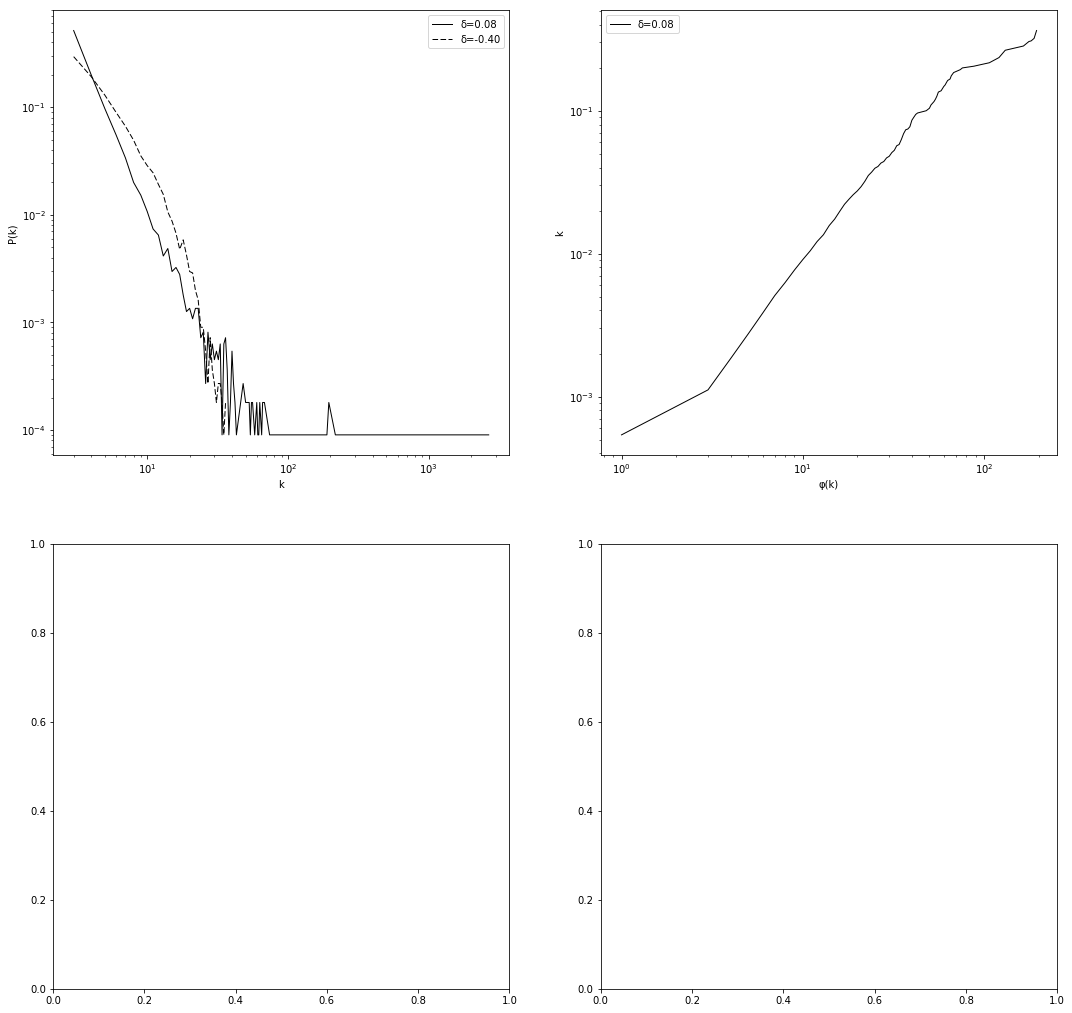

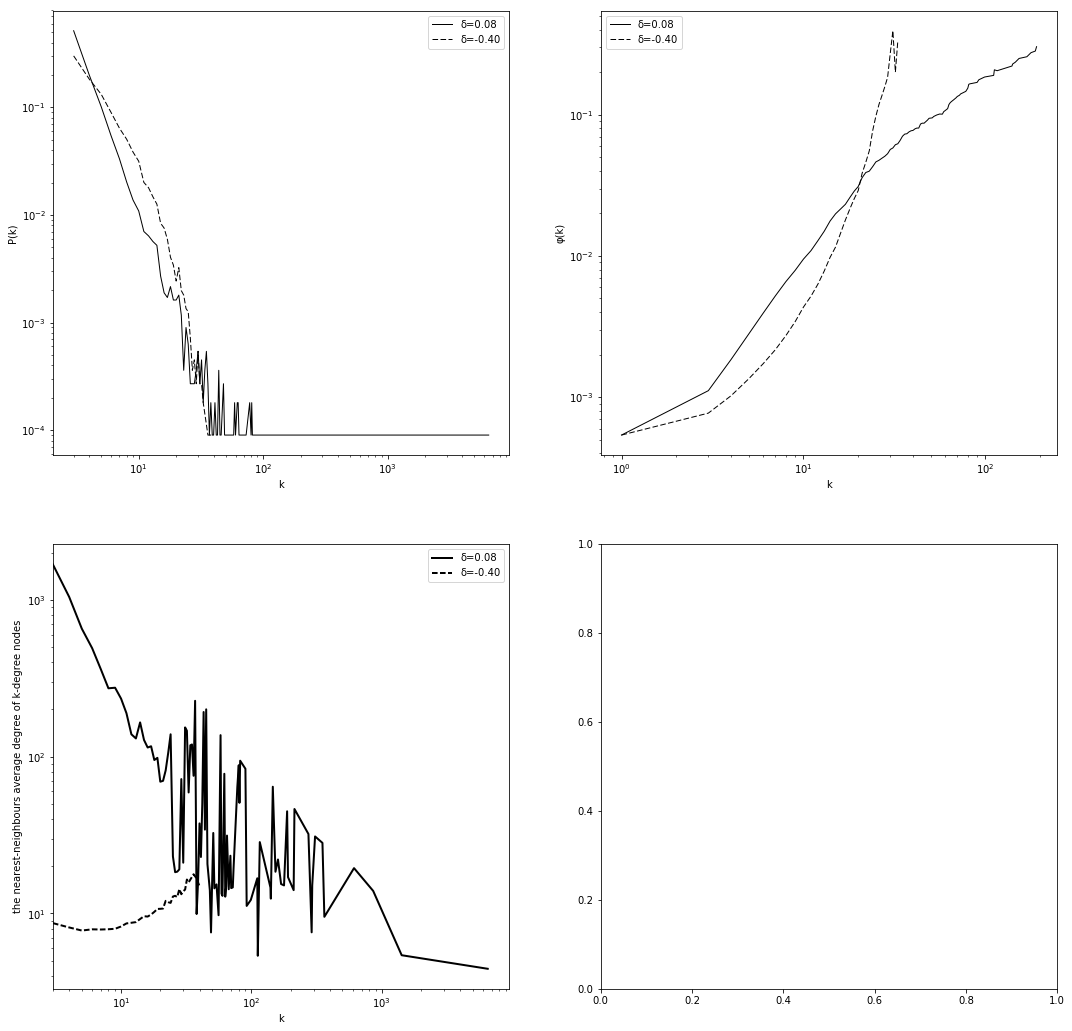

In [61]:
First_order_Excess_Degree = 0
Maximum_degree = 0
Xita = 0
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(18, 18))
m_NumNode = [m_Initial_N]
m_NumLink = [0]
m_Node_num_nghb = {}
tempDoubleX = {}
m_Link = []
record_P1 = []
m_delta= 0.08
Do_GenerateInitialStatus()
Do_GenerateBANetwork_P1()

a = []
for i in range(len(m_Link)):
    a.append( [m_Link[i][1][0],m_Link[i][1][1]])
G = nx.Graph(a)
    
m_NumNode = [m_Initial_N]
m_NumLink = [0]
m_Node_num_nghb = {}
tempDoubleX = {}
m_Link = []
record_P2 = []
m_delta= -0.40
Do_GenerateInitialStatus()
Do_GenerateBANetwork_P2()

a = []
for i in range(len(m_Link)):
    a.append( [m_Link[i][1][0],m_Link[i][1][1]])
GG = nx.Graph(a)
    

First_order_Excess_Degree = First_order_Excess_Degree + nx.degree_assortativity_coefficient(G)
    
    
    
Maximum_degree = Maximum_degree + max(G.degree().items(), key=lambda x: x[1])[1]


temp_x = []
temp_y = []
degree_G =  nx.degree_histogram(G)          
xx_G = range(len(degree_G))                             
yy_G = [z / float(sum(degree_G)) for z in degree_G] 
for index in range(len(xx_G)):
    if yy_G[index] != 0:
        temp_x.append(xx_G[index])
        temp_y.append(yy_G[index])  
plt.subplot(2,2,1)
plt.loglog(temp_x,temp_y,'-',color="black",linewidth=1,label="δ=0.08")
plt.legend()
plt.xlabel('k')
plt.ylabel('P(k)')

temp_x = []
temp_y = []
degree_G =  nx.degree_histogram(GG)          
xx_G = range(len(degree_G))                             
yy_G = [z / float(sum(degree_G)) for z in degree_G] 
for index in range(len(xx_G)):
    if yy_G[index] != 0:
        temp_x.append(xx_G[index])
        temp_y.append(yy_G[index])  
plt.subplot(2,2,1)
plt.loglog(temp_x,temp_y,'--',color="black",linewidth=1,label="δ=-0.40")
plt.legend()
plt.xlabel('k')
plt.ylabel('P(k)')



degree_rich_club_G = degree_rich_club_coefficient(G)
    
xxx_G = []
yyy_G = []
for iii in range(len(degree_rich_club_G)):
    xxx_G.append(degree_rich_club_G[iii][0])
for iii in range(len(degree_rich_club_G)):
    yyy_G.append(degree_rich_club_G[iii][1])
plt.subplot(2,2,2)
    
    
plt.loglog(xxx_G, yyy_G,'-',color="black",linewidth=1,label="δ=0.08")
plt.legend()
    
plt.xlabel('φ(k)')
plt.ylabel('k')

degree_rich_club_G = degree_rich_club_coefficient(GG)
    
xxx_G = []
yyy_G = []
for iii in range(len(degree_rich_club_G)):
    xxx_G.append(degree_rich_club_G[iii][0])
for iii in range(len(degree_rich_club_G)):
    yyy_G.append(degree_rich_club_G[iii][1])
plt.subplot(2,2,2)
    
    
plt.loglog(xxx_G, yyy_G,'--',color="black",linewidth=1,label="δ=-0.40")
plt.legend()
    
plt.ylabel('φ(k)')
plt.xlabel('k')


degree_correlation = nx.k_nearest_neighbors(G)
    
r = []
rr = []
for t in sorted(degree_correlation):
    r.append(t)
    rr.append(degree_correlation[t])
plt.subplot(2,2,3)       
plt.loglog(r,rr,'-',color="black",linewidth=2,label="δ=0.08")
plt.xlim(xmin=0)
plt.xlabel('k')
plt.ylabel('the nearest-neighbours average degree of k-degree nodes')
plt.legend()


degree_correlation = nx.k_nearest_neighbors(GG)
    
r = []
rr = []
for t in sorted(degree_correlation):
    r.append(t)
    rr.append(degree_correlation[t])
plt.subplot(2,2,3)       
plt.loglog(r,rr,'--',color="black",linewidth=2,label="δ=-0.40")
plt.xlim(xmin=0)
plt.xlabel('k')
plt.ylabel('the nearest-neighbours average degree of k-degree nodes')
plt.legend()

plt.show()

In [62]:
len(record_P2)

11113

In [78]:
record_P1[-1][9]

6506

In [79]:
record_P1[0][9]

5

In [80]:
max(G.degree().items(), key=lambda x: x[1])[1]

6506

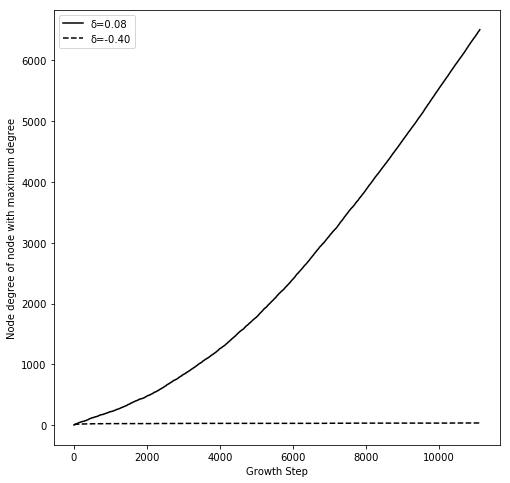

In [75]:
record_a = []
for ii in range(len(record_P1)):
    record_a.append(record_P1[ii][9])

record_b = []
for ii in range(len(record_P2)):
    record_b.append(record_P2[ii][6])

ii = range(1,len(record_P1)+1)
fff, axxx = plt.subplots(figsize=(8, 8))
axxx.plot(ii, record_a,'-',color="black",label="δ=0.08")
axxx.plot(ii, record_b,'--',color="black",label="δ=-0.40")


plt.xlabel('Growth Step')
plt.ylabel('Node degree of node with maximum degree')

plt.legend()
plt.show()
          

11113

11113